In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from rapidfuzz import fuzz, process
from sklearn.neighbors import NearestNeighbors

In [2]:
df_data = pd.read_csv('spotify_data.csv')

In [3]:
df_data.head()

,Unnamed: 0,artist_name,track_name,track_id,popularity,year,genre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,0,Jason Mraz,I Won't Give Up,53QF56cjZA9RTuuMZDrSA6,68,2012,acoustic,0.483,0.303,4,-10.058,1,0.0429,0.6940,0.000000,0.1150,0.139,133.406,240166,3
1,1,Jason Mraz,93 Million Miles,1s8tP3jP4GZcyHDsjvw218,50,2012,acoustic,0.572,0.454,3,-10.286,1,0.0258,0.4770,0.000014,0.0974,0.515,140.182,216387,4
2,2,Joshua Hyslop,Do Not Let Me Go,7BRCa8MPiyuvr2VU3O9W0F,57,2012,acoustic,0.409,0.234,3,-13.711,1,0.0323,0.3380,0.000050,0.0895,0.145,139.832,158960,4
3,3,Boyce Avenue,Fast Car,63wsZUhUZLlh1OsyrZq7sz,58,2012,acoustic,0.392,0.251,10,-9.845,1,0.0363,0.8070,0.000000,0.0797,0.508,204.961,304293,4
4,4,Andrew Belle,Sky's Still Blue,6nXIYClvJAfi6ujLiKqEq8,54,2012,acoustic,0.430,0.791,6,-5.419,0,0.0302,0.0726,0.019300,0.1100,0.217,171.864,244320,4


In [4]:
df_data

,Unnamed: 0,artist_name,track_name,track_id,popularity,year,genre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,0,Jason Mraz,I Won't Give Up,53QF56cjZA9RTuuMZDrSA6,68,2012,acoustic,0.483,0.303,4,-10.058,1,0.0429,0.6940,0.000000,0.1150,0.1390,133.406,240166,3
1,1,Jason Mraz,93 Million Miles,1s8tP3jP4GZcyHDsjvw218,50,2012,acoustic,0.572,0.454,3,-10.286,1,0.0258,0.4770,0.000014,0.0974,0.5150,140.182,216387,4
2,2,Joshua Hyslop,Do Not Let Me Go,7BRCa8MPiyuvr2VU3O9W0F,57,2012,acoustic,0.409,0.234,3,-13.711,1,0.0323,0.3380,0.000050,0.0895,0.1450,139.832,158960,4
3,3,Boyce Avenue,Fast Car,63wsZUhUZLlh1OsyrZq7sz,58,2012,acoustic,0.392,0.251,10,-9.845,1,0.0363,0.8070,0.000000,0.0797,0.5080,204.961,304293,4
4,4,Andrew Belle,Sky's Still Blue,6nXIYClvJAfi6ujLiKqEq8,54,2012,acoustic,0.430,0.791,6,-5.419,0,0.0302,0.0726,0.019300,0.1100,0.2170,171.864,244320,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1159759,1473391,Nicola Conte,Black Spirits,0m27F0IGHLGAWhqd6ccYst,4,2011,trip-hop,0.373,0.742,10,-6.453,0,0.0736,0.3250,0.000141,0.1590,0.5220,107.951,344013,3
1159760,1473392,Nicola Conte,Quiet Dawn,6er9p611eHEcUCU50j7D57,3,2011,trip-hop,0.516,0.675,7,-7.588,0,0.0326,0.7880,0.000129,0.1300,0.2640,119.897,285067,4
1159761,1473393,Amon Tobin,Morning Ms Candis,7jsMMqxy1tt0rH5FzYcZTQ,2,2011,trip-hop,0.491,0.440,5,-8.512,1,0.0274,0.4770,0.003130,0.0936,0.0351,100.076,214253,4
1159762,1473394,Peace Orchestra,Happy Christmas (War Is Over),77lA1InUaXztuRk2vOzD1S,0,2011,trip-hop,0.480,0.405,0,-13.343,1,0.0276,0.4310,0.000063,0.1250,0.2020,133.885,239133,3


In [5]:
df_data.dropna(inplace=True)

In [6]:
df_data

,Unnamed: 0,artist_name,track_name,track_id,popularity,year,genre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,0,Jason Mraz,I Won't Give Up,53QF56cjZA9RTuuMZDrSA6,68,2012,acoustic,0.483,0.303,4,-10.058,1,0.0429,0.6940,0.000000,0.1150,0.1390,133.406,240166,3
1,1,Jason Mraz,93 Million Miles,1s8tP3jP4GZcyHDsjvw218,50,2012,acoustic,0.572,0.454,3,-10.286,1,0.0258,0.4770,0.000014,0.0974,0.5150,140.182,216387,4
2,2,Joshua Hyslop,Do Not Let Me Go,7BRCa8MPiyuvr2VU3O9W0F,57,2012,acoustic,0.409,0.234,3,-13.711,1,0.0323,0.3380,0.000050,0.0895,0.1450,139.832,158960,4
3,3,Boyce Avenue,Fast Car,63wsZUhUZLlh1OsyrZq7sz,58,2012,acoustic,0.392,0.251,10,-9.845,1,0.0363,0.8070,0.000000,0.0797,0.5080,204.961,304293,4
4,4,Andrew Belle,Sky's Still Blue,6nXIYClvJAfi6ujLiKqEq8,54,2012,acoustic,0.430,0.791,6,-5.419,0,0.0302,0.0726,0.019300,0.1100,0.2170,171.864,244320,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1159759,1473391,Nicola Conte,Black Spirits,0m27F0IGHLGAWhqd6ccYst,4,2011,trip-hop,0.373,0.742,10,-6.453,0,0.0736,0.3250,0.000141,0.1590,0.5220,107.951,344013,3
1159760,1473392,Nicola Conte,Quiet Dawn,6er9p611eHEcUCU50j7D57,3,2011,trip-hop,0.516,0.675,7,-7.588,0,0.0326,0.7880,0.000129,0.1300,0.2640,119.897,285067,4
1159761,1473393,Amon Tobin,Morning Ms Candis,7jsMMqxy1tt0rH5FzYcZTQ,2,2011,trip-hop,0.491,0.440,5,-8.512,1,0.0274,0.4770,0.003130,0.0936,0.0351,100.076,214253,4
1159762,1473394,Peace Orchestra,Happy Christmas (War Is Over),77lA1InUaXztuRk2vOzD1S,0,2011,trip-hop,0.480,0.405,0,-13.343,1,0.0276,0.4310,0.000063,0.1250,0.2020,133.885,239133,3


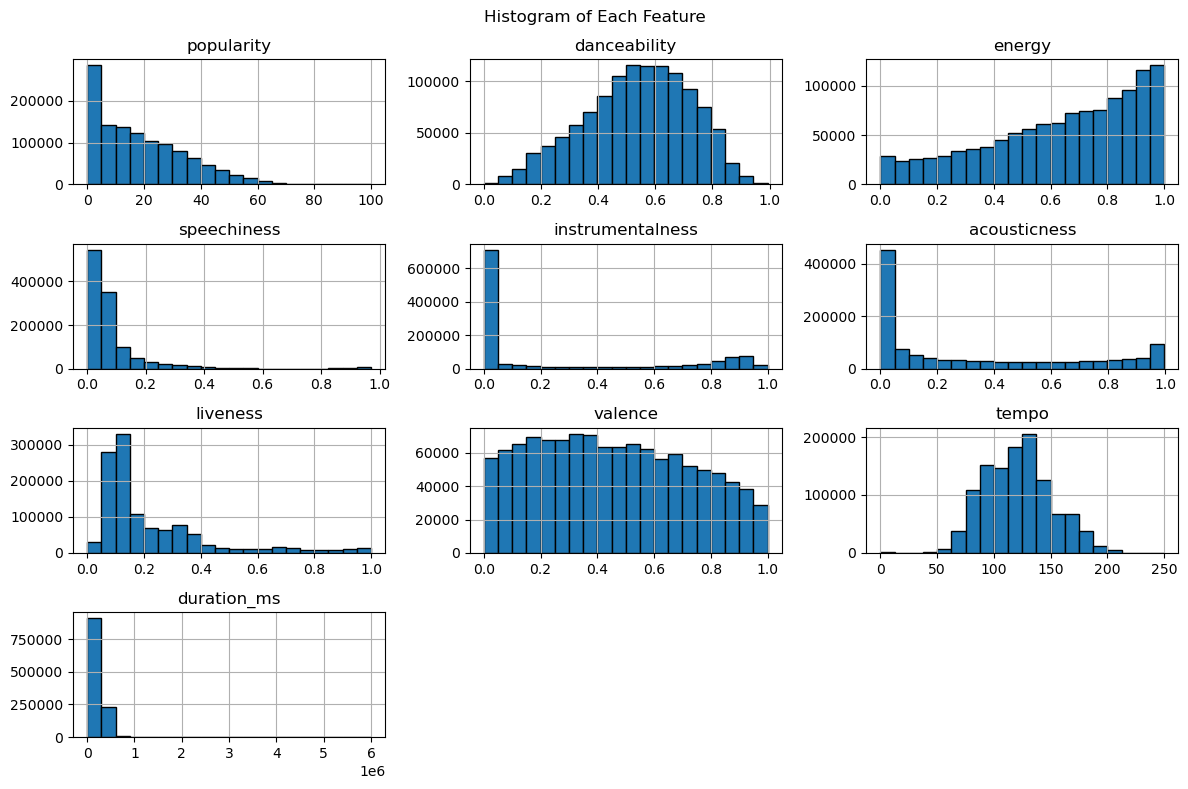

In [7]:
features =  ['popularity','danceability','energy','speechiness','instrumentalness','acousticness','liveness',
                    'valence','tempo','duration_ms']

features_data = df_data[features]

features_data.hist(bins=20, figsize=(12, 8), edgecolor='black')
plt.suptitle("Histogram of Each Feature")
plt.tight_layout()
plt.show()

In [8]:
df_numeric = df_data.select_dtypes(include=['float64','int64'])
corr_matrix = df_numeric.corr()
corr_matrix.style.background_gradient(cmap='coolwarm')

,Unnamed: 0,popularity,year,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
Unnamed: 0,1.000000,-0.199413,-0.512872,-0.015906,-0.006509,0.003702,-0.022318,0.020466,-0.016131,0.013756,-0.000200,0.010341,0.066814,-0.003731,0.050265,-0.003773
popularity,-0.199413,1.000000,0.345820,0.098538,0.009405,0.000389,0.104100,-0.023836,-0.024700,-0.059181,-0.152899,-0.056967,-0.018068,0.002567,-0.118490,0.030829
year,-0.512872,0.345820,1.000000,0.040108,0.019610,-0.003483,0.041426,-0.031344,0.028868,-0.025509,0.013603,-0.015535,-0.100893,0.018784,-0.090391,0.008466
danceability,-0.015906,0.098538,0.040108,1.000000,0.139245,0.031369,0.257163,-0.051725,0.086532,-0.176464,-0.169097,-0.119684,0.519884,-0.016180,-0.025840,0.183921
energy,-0.006509,0.009405,0.019610,0.139245,1.000000,0.038463,0.781004,-0.052065,0.114172,-0.752671,-0.184314,0.189114,0.247954,0.265158,0.012442,0.171190
key,0.003702,0.000389,-0.003483,0.031369,0.038463,1.000000,0.026868,-0.167639,0.012876,-0.034508,0.000221,-0.005427,0.025934,0.009533,0.008621,0.010426
loudness,-0.022318,0.104100,0.041426,0.257163,0.781004,0.026868,1.000000,-0.019095,0.023121,-0.621704,-0.403567,0.090774,0.294904,0.234019,-0.048463,0.171529
mode,0.020466,-0.023836,-0.031344,-0.051725,-0.052065,-0.167639,-0.019095,1.000000,-0.020099,0.067646,-0.058783,0.024795,0.018882,-0.005245,-0.038649,-0.016734
speechiness,-0.016131,-0.024700,0.028868,0.086532,0.114172,0.012876,0.023121,-0.020099,1.000000,0.031639,-0.142415,0.282483,0.039345,-0.031950,-0.062394,-0.028079
acousticness,0.013756,-0.059181,-0.025509,-0.176464,-0.752671,-0.034508,-0.621704,0.067646,0.031639,1.000000,0.094285,-0.030536,-0.103291,-0.240867,-0.064198,-0.169554


In [9]:
z_scores = np.abs(zscore(features_data))

df_clean = df_data[(z_scores < 3).all(axis=1)]
df_clean

,Unnamed: 0,artist_name,track_name,track_id,popularity,year,genre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
1,1,Jason Mraz,93 Million Miles,1s8tP3jP4GZcyHDsjvw218,50,2012,acoustic,0.572,0.454,3,-10.286,1,0.0258,0.4770,0.000014,0.0974,0.5150,140.182,216387,4
2,2,Joshua Hyslop,Do Not Let Me Go,7BRCa8MPiyuvr2VU3O9W0F,57,2012,acoustic,0.409,0.234,3,-13.711,1,0.0323,0.3380,0.000050,0.0895,0.1450,139.832,158960,4
3,3,Boyce Avenue,Fast Car,63wsZUhUZLlh1OsyrZq7sz,58,2012,acoustic,0.392,0.251,10,-9.845,1,0.0363,0.8070,0.000000,0.0797,0.5080,204.961,304293,4
4,4,Andrew Belle,Sky's Still Blue,6nXIYClvJAfi6ujLiKqEq8,54,2012,acoustic,0.430,0.791,6,-5.419,0,0.0302,0.0726,0.019300,0.1100,0.2170,171.864,244320,4
5,5,Chris Smither,What They Say,24NvptbNKGs6sPy1Vh1O0v,48,2012,acoustic,0.566,0.570,2,-6.420,1,0.0329,0.6880,0.000002,0.0943,0.9600,83.403,166240,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1159759,1473391,Nicola Conte,Black Spirits,0m27F0IGHLGAWhqd6ccYst,4,2011,trip-hop,0.373,0.742,10,-6.453,0,0.0736,0.3250,0.000141,0.1590,0.5220,107.951,344013,3
1159760,1473392,Nicola Conte,Quiet Dawn,6er9p611eHEcUCU50j7D57,3,2011,trip-hop,0.516,0.675,7,-7.588,0,0.0326,0.7880,0.000129,0.1300,0.2640,119.897,285067,4
1159761,1473393,Amon Tobin,Morning Ms Candis,7jsMMqxy1tt0rH5FzYcZTQ,2,2011,trip-hop,0.491,0.440,5,-8.512,1,0.0274,0.4770,0.003130,0.0936,0.0351,100.076,214253,4
1159762,1473394,Peace Orchestra,Happy Christmas (War Is Over),77lA1InUaXztuRk2vOzD1S,0,2011,trip-hop,0.480,0.405,0,-13.343,1,0.0276,0.4310,0.000063,0.1250,0.2020,133.885,239133,3


In [10]:
scaler = StandardScaler()

cleaned = df_clean[features]

scaled_features = scaler.fit_transform(cleaned)

df_scaled = pd.DataFrame(scaled_features, columns=features)


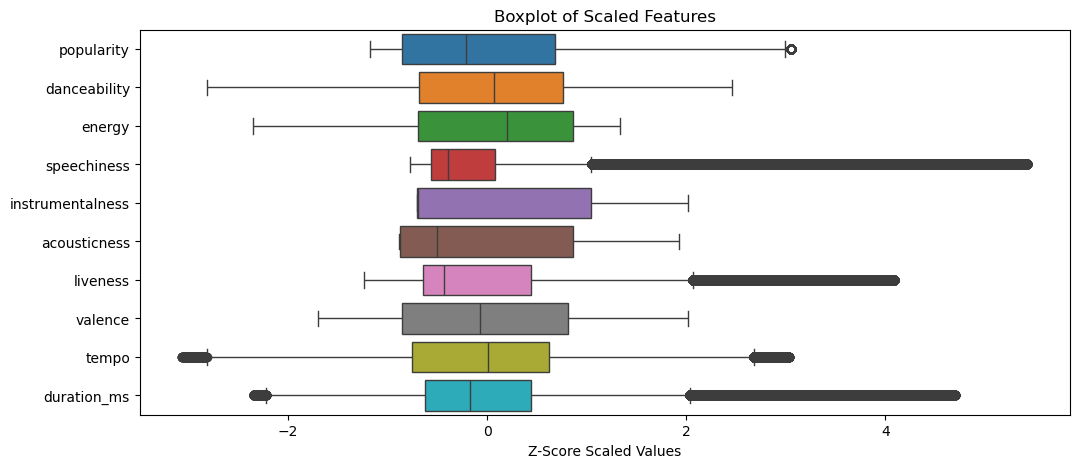

In [11]:

df_scaled_df = pd.DataFrame(df_scaled, columns=features)

plt.figure(figsize=(12, 5))
sns.boxplot(data=df_scaled_df, orient="h")
plt.title("Boxplot of Scaled Features")
plt.xlabel("Z-Score Scaled Values")
plt.show()

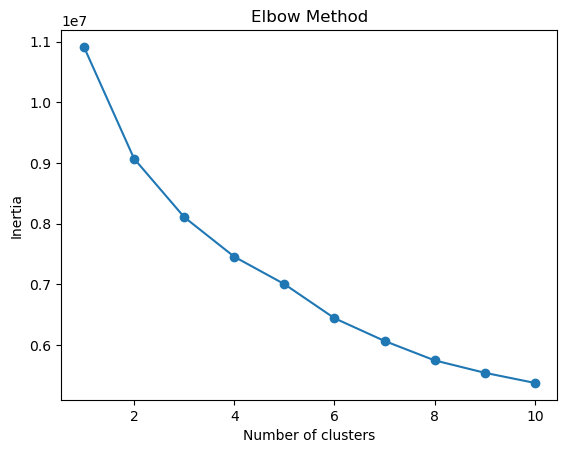

In [12]:
inertias = []
K = range(1, 11)
for k in K:
    
    kmeans = KMeans(n_clusters=k, random_state=0, n_init=10).fit(df_scaled)
    inertias.append(kmeans.inertia_)

plt.plot(K, inertias, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

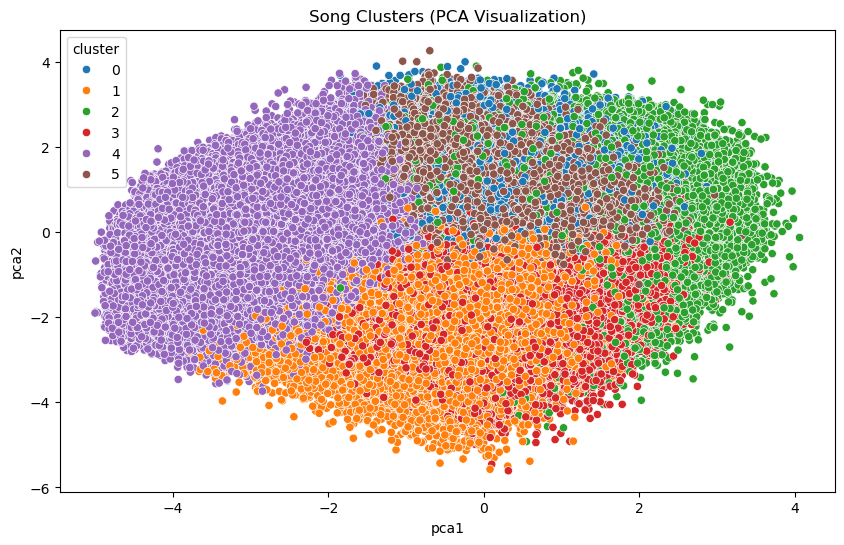

In [13]:
kmeans = KMeans(n_clusters=6, random_state=42, n_init=10)
df_scaled['cluster'] = kmeans.fit_predict(df_scaled)

pca = PCA(n_components=2)
components = pca.fit_transform(df_scaled[features])

df_scaled['pca1'] = components[:, 0]
df_scaled['pca2'] = components[:, 1]

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_scaled, x='pca1', y='pca2', hue='cluster', palette='tab10')
plt.title('Song Clusters (PCA Visualization)')
plt.show()

In [14]:
def get_best_match(song_name, track_names, limit=1):
    matches = process.extract(song_name, track_names, scorer=fuzz.WRatio, limit=limit)
    return matches[0][0] if matches else None
def recommend_similar_songs(song_name, artist_name=None, k=5):
    track_names = df_clean['track_name'].values
    best_song_name = get_best_match(song_name, track_names)
    
    if artist_name:
        match = df_clean[
            (df_clean['track_name'].str.lower() == best_song_name.lower()) &
            (df_clean['artist_name'].str.lower() == artist_name.lower())
        ]
    else:
        match = df_clean[df_clean['track_name'].str.lower() == best_song_name.lower()]
    
    if match.empty:
        return f"❌ Song '{song_name}' not found in dataset."
    
    song_index = match.index[0]

    song_vector = pd.DataFrame([df_scaled.loc[song_index, features].values], columns=features)
    
    song_cluster = kmeans.predict(song_vector)[0]
    
    cluster_songs = df_scaled[df_scaled['cluster'] == song_cluster].copy()
    
    knn_model = NearestNeighbors(n_neighbors=k+1, algorithm='ball_tree')  # +1 to exclude the input song itself
    knn_model.fit(cluster_songs[features])
    
    distances, indices = knn_model.kneighbors(song_vector)

    indices = indices[0][1:]
    
    cluster_indices = cluster_songs.index[indices]
    recommendations = df_clean.loc[cluster_indices, ['track_name', 'artist_name']]
    
    print(f"🎵 Recommendations for '{best_song_name}':")
    for i, row in recommendations.iterrows():
        print(f"🎶 {row['track_name']} — {row['artist_name']}")
recommend_similar_songs("Shape of ")        

🎵 Recommendations for 'Shape of You':
🎶 Acid Rain — The Spits
🎶 Taking My Chances — The Outfield
🎶 Cryptic — Rezz
🎶 On the Attack — Off With Their Heads
🎶 Deus Não Esqueceu de Você — Alex Soares
